In [100]:
import numpy as np
import pandas as pd
# TensorFlow framework
from tensorflow import keras
# Keras algorithms for deep learning and loading datasets
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [101]:
df_train = pd.read_csv('mobile_price_train.csv')
df_test = pd.read_csv('mobile_price_test.csv')

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split

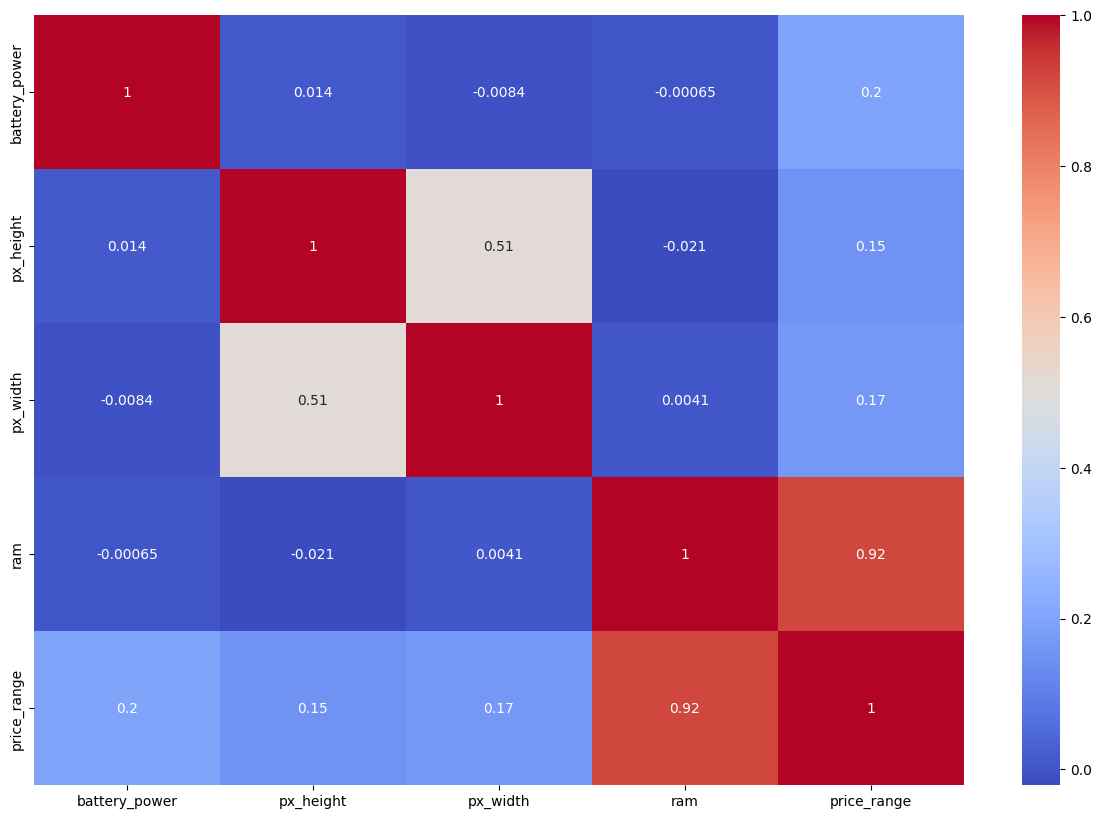

In [112]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()


In [104]:
df_train.drop(['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'], axis=1, inplace=True)
# ['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [105]:

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [106]:
columns_list = df_train.columns.tolist()
n= columns_list
print(n)

['battery_power', 'px_height', 'px_width', 'ram', 'price_range']


In [107]:
numerical_cols = n

for col in numerical_cols:
    outliers = detect_outliers_iqr(df_train[col])
    print(f"\nOutliers in '{col}' column:\n{outliers}")
    print(f"Number of outliers in '{col}': {len(outliers)}")


Outliers in 'battery_power' column:
Series([], Name: battery_power, dtype: int64)
Number of outliers in 'battery_power': 0

Outliers in 'px_height' column:
988     1949
1771    1960
Name: px_height, dtype: int64
Number of outliers in 'px_height': 2

Outliers in 'px_width' column:
Series([], Name: px_width, dtype: int64)
Number of outliers in 'px_width': 0

Outliers in 'ram' column:
Series([], Name: ram, dtype: int64)
Number of outliers in 'ram': 0

Outliers in 'price_range' column:
Series([], Name: price_range, dtype: int64)
Number of outliers in 'price_range': 0


In [108]:

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

numerical_cols = n

for col in numerical_cols:
    outliers = detect_outliers_iqr(df_train[col])
    print(f"\nOutliers in '{col}' column:\n{outliers}")
    print(f"Number of outliers in '{col}': {len(outliers)}")

    median_value = df_train[col].median()
    df_train[col] = np.where((df_train[col] < df_train[col].quantile(0.25) - 1.5 * (df_train[col].quantile(0.75) - df_train[col].quantile(0.25))) |
                             (df_train[col] > df_train[col].quantile(0.75) + 1.5 * (df_train[col].quantile(0.75) - df_train[col].quantile(0.25))),
                             median_value,
                             df_train[col])

    print(f"Median value used to replace outliers in '{col}': {median_value}")



Outliers in 'battery_power' column:
Series([], Name: battery_power, dtype: int64)
Number of outliers in 'battery_power': 0
Median value used to replace outliers in 'battery_power': 1226.0

Outliers in 'px_height' column:
988     1949
1771    1960
Name: px_height, dtype: int64
Number of outliers in 'px_height': 2
Median value used to replace outliers in 'px_height': 564.0

Outliers in 'px_width' column:
Series([], Name: px_width, dtype: int64)
Number of outliers in 'px_width': 0
Median value used to replace outliers in 'px_width': 1247.0

Outliers in 'ram' column:
Series([], Name: ram, dtype: int64)
Number of outliers in 'ram': 0
Median value used to replace outliers in 'ram': 2146.5

Outliers in 'price_range' column:
Series([], Name: price_range, dtype: int64)
Number of outliers in 'price_range': 0
Median value used to replace outliers in 'price_range': 1.5


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_train.drop('price_range', axis=1)
y = df_train['price_range']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc*100}")


Accuracy: 97.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


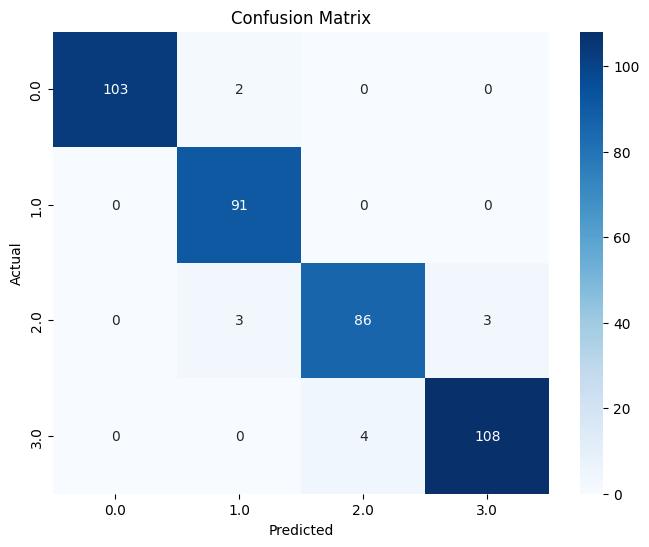

In [137]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<Axes: >

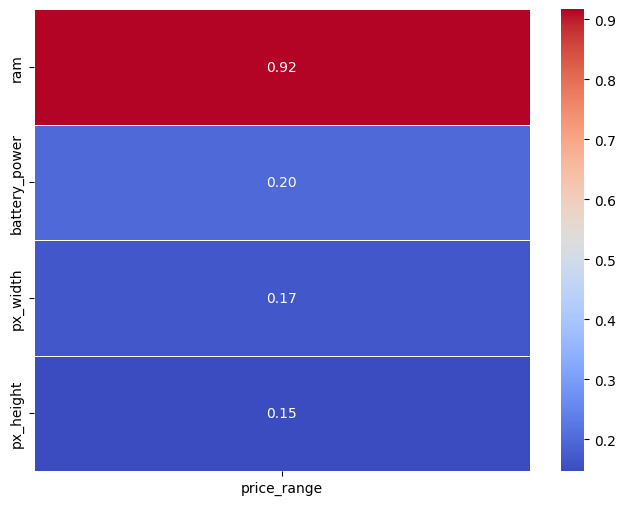

In [139]:
corr_matrix = df_train.corr()
feature_corr = corr_matrix[['price_range']].drop(index=['price_range'])
feature_corr = feature_corr.reindex(feature_corr['price_range'].abs().sort_values(ascending=False).index)
plt.figure(figsize=(8, 6))
sns.heatmap(feature_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)